# Model Modified Beta PDFs using a Lambda
### Compares Symmetical and Asymmetrical Distributions using the modified alpha and beta
D.M. Advocate, Feburary 2022

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14}) # Global command must set in top


## Modified Beta Distribution (Method 2) - Plots a family of Beta Distributions
- Method 2 has a modified formula for the shape parameters alpha (a) and beta (b) that can increase or decrease the spread of the distribution. The parameter Lambda (L) is used to modify the spread, where L=10 approximates the normal distribution. Smaller values (L < 10) increase the spread with .01 approximating a uniform distribution. L > 10 decreases the spread of the distribution.
- The method is based on Heiko Onnen's 2021 article HANDS-ON TUTORIAL, Python Scenario Analysis: Modeling Expert Estimates with the beta-PERT Distribution, And How to Add a New, User-Defined Distribution to SciPy’s Catalogue,
- https://towardsdatascience.com/python-scenario-analysis-modeling-expert-estimates-with-the-beta-pert-distribution-22a5e90cfa79
##### Method 2 - Calculate a and b <br>
- 𝛼=1+ 𝜆 * (mode - min) / (max - min)
- 𝛽=1+ 𝜆 * (max - mode) / (max - min)

### Plot Symmetic Family of Curves using Method 2

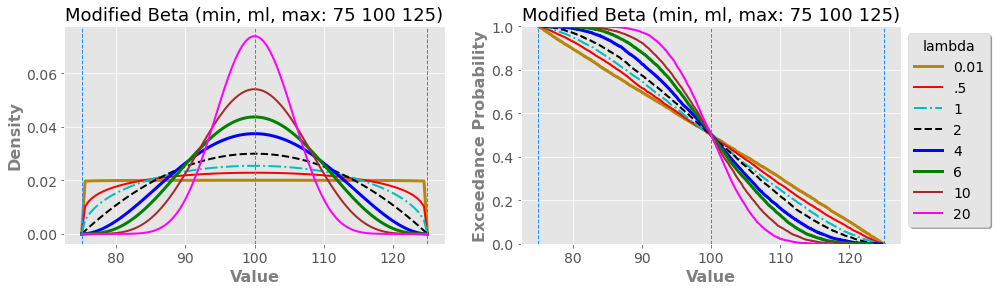

In [2]:
# Produce a family of Symmetric Beta Curves using METHOD 2

# Set Min, Ml, Max and Size parameters
amin=75    # Minimum Value 
bml=100  # Most-Likely Value
cmax=125 # Maximum Value
size=10000   # Number of random samples for the distribution

########## This code is incorporated in the Loop Below ###################
# L = 4  #Default gamma is 4. Smaller values flatten and large vaues peak
# a=1+L*(bml-amin)/(cmax-amin)
# b=1+L*(cmax-bml)/(cmax-amin)
#############################################################

# This list is for the symmetric distribution w/ a,b=3,3. You'll have to divide by 10
# list=np.arange(5,35,5) 

# Set X values to be evaluated
fbx = np.linspace(amin, cmax, 100)

# Loop through Lambda values to be evaluated
L=[1, 50, 100, 200, 400, 600, 1000, 2000] 
for i in L:
    globals()["fby_"+str(i)] = beta.pdf(fbx, 1+i/100*(bml-amin)/(cmax-amin), 1+i/100*(cmax-bml)/(cmax-amin), loc=amin, scale=cmax-amin)
    globals()["fbvals_"+str(i)] =beta.rvs(1+i/100*(bml-amin)/(cmax-amin), 1+i/100*(cmax-bml)/(cmax-amin),
                                          loc=amin, scale=cmax-amin, size=size, random_state=None)
# Plotting    
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,4))
#ax1.hist(fbx, bins=30, edgecolor='gray', density=True, alpha=.2)
ax1.plot(fbx, fby_1  ,lw=3, c='darkgoldenrod', ls='-', label='0.01')
ax1.plot(fbx, fby_50 ,lw=2, c='r', ls='-', label='0.5')
ax1.plot(fbx, fby_100,lw=2, c='c', ls='-.', label='1')
ax1.plot(fbx, fby_200,lw=2, c='k', ls='--', label='2')
ax1.plot(fbx, fby_400,lw=3, c='b', ls='-', label='4')
ax1.plot(fbx, fby_600,lw=3, c='g', ls='-', label='6')
ax1.plot(fbx, fby_1000,lw=2, c='brown', ls='-', label='10')
ax1.plot(fbx, fby_2000,lw=2, c='magenta', ls='-', label='20')
ax1.set_title('Modified Beta (min, ml, max: '+ str(amin)+' '+str(bml)+' ' + str(cmax)+')', fontsize=18)       
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
#ax1.legend(fontsize=14, title='lambda', shadow=True)

sns.ecdfplot(fbvals_1, lw=3, c='darkgoldenrod', ls='-', label='0.01', complementary=True)
sns.ecdfplot(fbvals_50,lw=2, c='r', ls='-', label='.5', complementary=True)
sns.ecdfplot(fbvals_100,lw=2, c='c', ls='-.', label='1', complementary=True)
sns.ecdfplot(fbvals_200,lw=2, c='k', ls='--', label='2', complementary=True)
sns.ecdfplot(fbvals_400,lw=3, c='b', ls='-', label='4', complementary=True)
sns.ecdfplot(fbvals_600,lw=3, c='g', ls='-', label='6', complementary=True)
sns.ecdfplot(fbvals_1000,lw=2, c='brown', ls='-', label='10', complementary=True)
sns.ecdfplot(fbvals_2000,lw=2, c='magenta', ls='-', label='20', complementary=True)
ax2.legend(fontsize=14, title='lambda', shadow=True, bbox_to_anchor = (1.0, 1.0))
ax2.set_title('Modified Beta (min, ml, max: '+ str(amin)+' '+str(bml)+' ' + str(cmax)+')', fontsize=18)
ax2.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax2.set_ylabel('Exceedance Probability', fontsize =16, fontweight='bold', color='gray')

ax1.axvline(x=amin, color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=bml,  color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=cmax, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=amin, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=bml,  color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=cmax, color='dodgerblue', lw=1, linestyle='--')

plt.show()

# ################################################# Change Directory and write files
# ##os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# ## print(os.path.abspath(os.curdir))

# fig.savefig('Flattened Beta.png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

### Plot Asymmetic Family of Curves using Method 2

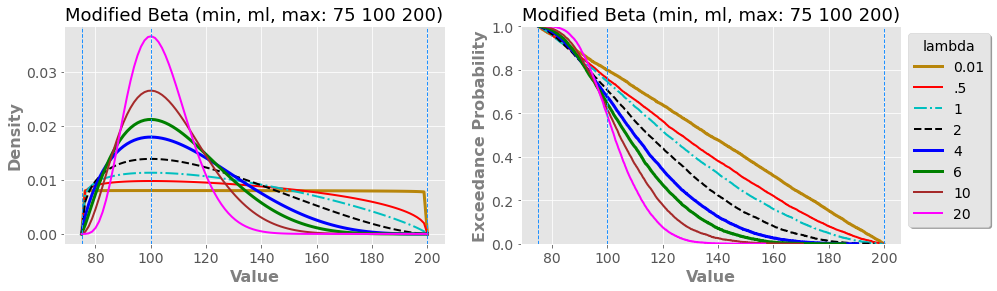

In [3]:
# Produce a family of Symmetric Beta Curves using METHOD 2

# Set Min, Ml, Max and Size parameters
amin2=75    # Minimum Value 
bml2=100  # Most-Likely Value
cmax2=200 # Maximum Value
size=10000   # Number of random samples for the distribution

########## This code is incorporated in the Loop Below ###################
# L = 4  #Default gamma is 4. Smaller values flatten and large vaues peak
# a=1+L*(bml-amin)/(cmax-amin)
# b=1+L*(cmax-bml)/(cmax-amin)
#############################################################

# This list is for the symmetric distribution w/ a,b=3,3. You'll have to divide by 10
# list=np.arange(5,35,5) 

# Set X values to be evaluated
fbx2 = np.linspace(amin2, cmax2, 100)

# Loop through Lambda values to be evaluated
L=[1, 50, 100, 200, 400, 600, 1000, 2000] 
for i in L:
    globals()["fby2_"+str(i)] = beta.pdf(fbx2, 1+i/100*(bml2-amin2)/(cmax2-amin2), 1+i/100*(cmax2-bml2)/(cmax2-amin2),
                                         loc=amin2, scale=cmax2-amin2)
    globals()["fbvals2_"+str(i)] =beta.rvs(1+i/100*(bml2-amin2)/(cmax2-amin2), 1+i/100*(cmax2-bml2)/(cmax2-amin2),
                                        loc=amin2, scale=cmax2-amin2, size=size, random_state=None)
# Plotting    
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
#ax1.hist(fbx, bins=30, edgecolor='gray', density=True, alpha=.2)
ax1.plot(fbx2, fby2_1  ,lw=3, c='darkgoldenrod', ls='-', label='0.01')
ax1.plot(fbx2, fby2_50 ,lw=2, c='r', ls='-', label='0.5')
ax1.plot(fbx2, fby2_100,lw=2, c='c', ls='-.', label='1')
ax1.plot(fbx2, fby2_200,lw=2, c='k', ls='--', label='2')
ax1.plot(fbx2, fby2_400,lw=3, c='b', ls='-', label='4')
ax1.plot(fbx2, fby2_600,lw=3, c='g', ls='-', label='6')
ax1.plot(fbx2, fby2_1000,lw=2, c='brown', ls='-', label='10')
ax1.plot(fbx2, fby2_2000,lw=2, c='magenta', ls='-', label='20')
ax1.set_title('Modified Beta (min, ml, max: '+ str(amin2)+' '+str(bml2)+' ' + str(cmax2)+')', fontsize=18)       
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
#ax1.legend(fontsize=14, title='lambda', shadow=True)

sns.ecdfplot(fbvals2_1, lw=3, c='darkgoldenrod', ls='-', label='0.01', complementary=True)
sns.ecdfplot(fbvals2_50,lw=2, c='r', ls='-', label='.5', complementary=True)
sns.ecdfplot(fbvals2_100,lw=2, c='c', ls='-.', label='1', complementary=True)
sns.ecdfplot(fbvals2_200,lw=2, c='k', ls='--', label='2', complementary=True)
sns.ecdfplot(fbvals2_400,lw=3, c='b', ls='-', label='4', complementary=True)
sns.ecdfplot(fbvals2_600,lw=3, c='g', ls='-', label='6', complementary=True)
sns.ecdfplot(fbvals2_1000,lw=2, c='brown', ls='-', label='10', complementary=True)
sns.ecdfplot(fbvals2_2000,lw=2, c='magenta', ls='-', label='20', complementary=True)
ax2.legend(fontsize=14, title='lambda', shadow=True, bbox_to_anchor = (1.0, 1.0))
ax2.set_title('Modified Beta (min, ml, max: '+ str(amin2)+' '+str(bml2)+' ' + str(cmax2)+')', fontsize=18)
ax2.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax2.set_ylabel('Exceedance Probability', fontsize =16, fontweight='bold', color='gray')

ax1.axvline(x=amin2, color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=bml2,  color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=cmax2, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=amin2, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=bml2,  color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=cmax2, color='dodgerblue', lw=1, linestyle='--')

plt.show()

# ################################################# Change Directory and write files
# ##os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# ## print(os.path.abspath(os.curdir))

# fig.savefig('Flattened Beta.png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

## Compare Symmetrical and Skewed Probability Distributions

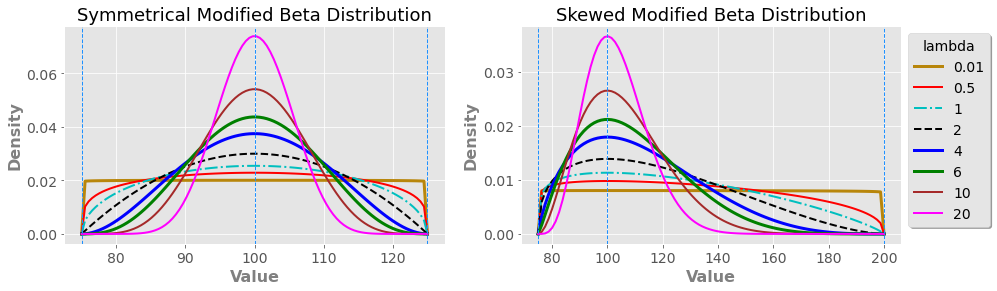

/Users/davidadvocate/Documents/Python/Scripts


In [4]:
#fbx=bx
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
ax1.plot(fbx, fby_1  ,lw=3, c='darkgoldenrod', ls='-', label='0.01')
ax1.plot(fbx, fby_50 ,lw=2, c='r', ls='-', label='0.5')
ax1.plot(fbx, fby_100,lw=2, c='c', ls='-.', label='1')
ax1.plot(fbx, fby_200,lw=2, c='k', ls='--', label='2')
ax1.plot(fbx, fby_400,lw=3, c='b', ls='-', label='4')
ax1.plot(fbx, fby_600,lw=3, c='g', ls='-', label='6')
ax1.plot(fbx, fby_1000,lw=2, c='brown', ls='-', label='10')
ax1.plot(fbx, fby_2000,lw=2, c='magenta', ls='-', label='20')
ax1.set_title('Symmetrical Modified Beta Distribution', fontsize=18)       
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
#ax1.legend(fontsize=14, title='lambda', shadow=True)

ax2.plot(fbx2, fby2_1  ,lw=3, c='darkgoldenrod', ls='-', label='0.01')
ax2.plot(fbx2, fby2_50 ,lw=2, c='r', ls='-', label='0.5')
ax2.plot(fbx2, fby2_100,lw=2, c='c', ls='-.', label='1')
ax2.plot(fbx2, fby2_200,lw=2, c='k', ls='--', label='2')
ax2.plot(fbx2, fby2_400,lw=3, c='b', ls='-', label='4')
ax2.plot(fbx2, fby2_600,lw=3, c='g', ls='-', label='6')
ax2.plot(fbx2, fby2_1000,lw=2, c='brown', ls='-', label='10')
ax2.plot(fbx2, fby2_2000,lw=2, c='magenta', ls='-', label='20')
ax2.set_title('Skewed Modified Beta Distribution', fontsize=18)       
ax2.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax2.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
ax2.legend(fontsize=14, title='lambda', shadow=True, bbox_to_anchor = (1.0, 1.0))

ax1.axvline(x=75, color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=100,  color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=125, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=75, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=100,  color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=200, color='dodgerblue', lw=1, linestyle='--')

plt.show()

################################################# Change Directory and write files
#os.mkdir("../Figures")                         # Run once to create a directory
os.chdir("../Figures")                          # Change directory
# print(os.path.abspath(os.curdir))

fig.savefig('Compare Flat Distributions', bbox_inches='tight', dpi=150)
os.chdir("../Scripts")                          # Change Directory back to original for saving script
print(os.path.abspath(os.curdir))
################################################ End of save figure script

### Descriptive Statistics

,Lambda,mean,sem,min,max,std,skew_,kurtosis,P95,P50,P05,pct_delta_std
0,0.01,99.98,0.15,75.01,124.99,14.52,-0.01,-1.21,77.37,100.13,122.47,-0.08
1,0.5,99.95,0.13,75.02,124.96,13.38,0.01,-1.11,78.87,99.96,121.35,-0.08
2,1,99.86,0.12,75.14,124.97,12.39,0.02,-1.00,79.96,99.81,119.84,-0.10
3,2,99.96,0.11,75.33,124.72,11.32,0.00,-0.88,81.54,99.89,118.39,-0.18
4,4,99.93,0.10,76.17,124.52,9.55,0.00,-0.68,84.38,100.08,115.64,-0.16
5,6,100.13,0.08,76.54,123.31,8.23,0.00,-0.58,86.53,100.09,113.57,-0.19
6,10,99.97,0.07,79.26,120.68,6.94,-0.01,-0.41,88.54,99.96,111.45,-0.33
7,20,99.96,0.05,82.13,117.59,5.21,-0.02,-0.25,91.39,100.05,108.52,nan


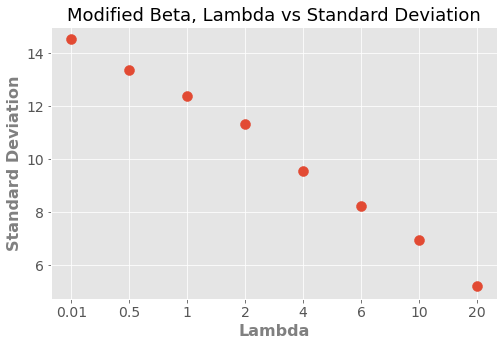

In [5]:
db = {'Lambda' : ['0.01', '0.5', '1', '2', '4', '6', '10', '20'],
     'mean': [np.mean(fbvals_1), np.mean(fbvals_50), np.mean(fbvals_100), np.mean(fbvals_200), np.mean(fbvals_400), np.mean(fbvals_600), np.mean(fbvals_1000), np.mean(fbvals_2000)],
     'sem':  [stats.sem(fbvals_1), stats.sem(fbvals_50), stats.sem(fbvals_100), stats.sem(fbvals_200), stats.sem(fbvals_400), stats.sem(fbvals_600), stats.sem(fbvals_1000), stats.sem(fbvals_2000)],
     'min':  [np.min(fbvals_1), np.min(fbvals_50), np.min(fbvals_100), np.min(fbvals_200), np.min(fbvals_400), np.min(fbvals_600), np.min(fbvals_1000), np.min(fbvals_2000)],
     'max':  [np.max(fbvals_1), np.max(fbvals_50), np.max(fbvals_100), np.max(fbvals_200), np.max(fbvals_400), np.max(fbvals_600), np.max(fbvals_1000), np.max(fbvals_2000)],
     'std':  [np.std(fbvals_1), np.std(fbvals_50), np.std(fbvals_100), np.std(fbvals_200), np.std(fbvals_400), np.std(fbvals_600), np.std(fbvals_1000), np.std(fbvals_2000)],
     'skew_': [skew(fbvals_1), skew(fbvals_50), skew(fbvals_100), skew(fbvals_200), skew(fbvals_400), skew(fbvals_600), skew(fbvals_1000), skew(fbvals_2000)],
     'kurtosis': [kurtosis(fbvals_1), kurtosis(fbvals_50), kurtosis(fbvals_100), kurtosis(fbvals_200), kurtosis(fbvals_400), kurtosis(fbvals_600), kurtosis(fbvals_1000), kurtosis(fbvals_2000)],
     'P95':  [np.percentile(fbvals_1,5), np.percentile(fbvals_50,5), np.percentile(fbvals_100,5), np.percentile(fbvals_200,5), np.percentile(fbvals_400,5), np.percentile(fbvals_600, 5), np.percentile(fbvals_1000, 5), np.percentile(fbvals_2000, 5)],
     'P50':  [np.percentile(fbvals_1,50), np.percentile(fbvals_50,50), np.percentile(fbvals_100,50), np.percentile(fbvals_200,50), np.percentile(fbvals_400,50), np.percentile(fbvals_600, 50), np.percentile(fbvals_1000, 50), np.percentile(fbvals_2000, 50)],
     'P05':  [np.percentile(fbvals_1,95), np.percentile(fbvals_50,95), np.percentile(fbvals_100,95), np.percentile(fbvals_200,95), np.percentile(fbvals_400,95), np.percentile(fbvals_600, 95), np.percentile(fbvals_1000, 95), np.percentile(fbvals_2000, 95)]}  
df_stats_beta = pd.DataFrame(data=db) #.set_index('DisType')
df_stats_beta['pct_delta_std']=(df_stats_beta['std'].shift(-1)-df_stats_beta['std'])/df_stats_beta['std'].shift(-1)
pd.options.display.float_format = "{:,.2f}".format
df_stats_beta.style.set_table_attributes('style="font-size: 24px"')
display(df_stats_beta)

fig=plt.subplots(figsize=(8,5))
plt.scatter(df_stats_beta['Lambda'],df_stats_beta['std'], s=100)
plt.title('Modified Beta, Lambda vs Standard Deviation', fontsize=18)       
plt.xlabel('Lambda', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Standard Deviation', fontsize =16, fontweight='bold', color='gray')
plt.show()

### Discriptive Statistics for the Skewed Beta

,Lambda,mean,sem,min,max,std,skew_,kurtosis,P95,P50,P05,pct_delta_std
0,0.01,137.08,0.36,75.01,200.00,35.83,0.01,-1.19,81.48,136.69,193.28,-0.08
1,0.5,129.39,0.33,75.02,199.87,33.12,0.22,-1.04,80.99,126.70,186.13,-0.08
2,1,125.10,0.31,75.05,199.52,30.72,0.33,-0.85,80.75,121.67,179.88,-0.16
3,2,118.50,0.27,75.12,196.29,26.54,0.47,-0.57,81.34,114.89,167.32,-0.22
4,4,112.82,0.22,75.10,190.51,21.70,0.59,-0.18,82.66,109.85,152.90,-0.16
5,6,109.53,0.19,75.36,185.93,18.70,0.60,-0.11,83.60,107.08,144.33,-0.25
6,10,106.28,0.15,76.17,170.73,15.01,0.64,0.27,84.94,104.31,133.67,-0.39
7,20,103.42,0.11,78.16,157.11,10.80,0.50,0.11,87.42,102.39,122.77,nan


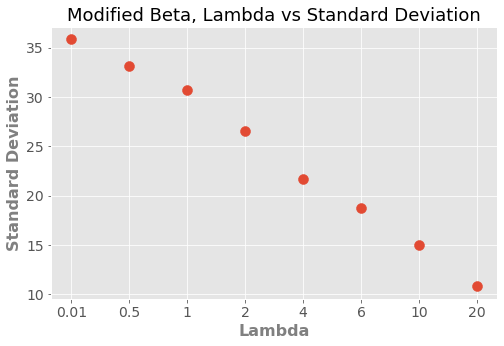

In [9]:
db2 = {'Lambda' : ['0.01', '0.5', '1', '2', '4', '6', '10', '20'],
     'mean': [np.mean(fbvals2_1), np.mean(fbvals2_50), np.mean(fbvals2_100), np.mean(fbvals2_200), np.mean(fbvals2_400), np.mean(fbvals2_600), np.mean(fbvals2_1000), np.mean(fbvals2_2000)],
     'sem':  [stats.sem(fbvals2_1), stats.sem(fbvals2_50), stats.sem(fbvals2_100), stats.sem(fbvals2_200), stats.sem(fbvals2_400), stats.sem(fbvals2_600), stats.sem(fbvals2_1000), stats.sem(fbvals2_2000)],
     'min':  [np.min(fbvals2_1), np.min(fbvals2_50), np.min(fbvals2_100), np.min(fbvals2_200), np.min(fbvals2_400), np.min(fbvals2_600), np.min(fbvals2_1000), np.min(fbvals2_2000)],
     'max':  [np.max(fbvals2_1), np.max(fbvals2_50), np.max(fbvals2_100), np.max(fbvals2_200), np.max(fbvals2_400), np.max(fbvals2_600), np.max(fbvals2_1000), np.max(fbvals2_2000)],
     'std':  [np.std(fbvals2_1), np.std(fbvals2_50), np.std(fbvals2_100), np.std(fbvals2_200), np.std(fbvals2_400), np.std(fbvals2_600), np.std(fbvals2_1000), np.std(fbvals2_2000)],
     'skew_': [skew(fbvals2_1), skew(fbvals2_50), skew(fbvals2_100), skew(fbvals2_200), skew(fbvals2_400), skew(fbvals2_600), skew(fbvals2_1000), skew(fbvals2_2000)],
     'kurtosis': [kurtosis(fbvals2_1), kurtosis(fbvals2_50), kurtosis(fbvals2_100), kurtosis(fbvals2_200), kurtosis(fbvals2_400), kurtosis(fbvals2_600), kurtosis(fbvals2_1000), kurtosis(fbvals2_2000)],
     'P95':  [np.percentile(fbvals2_1,5), np.percentile(fbvals2_50,5), np.percentile(fbvals2_100,5), np.percentile(fbvals2_200,5), np.percentile(fbvals2_400,5), np.percentile(fbvals2_600, 5), np.percentile(fbvals2_1000, 5), np.percentile(fbvals2_2000, 5)],
     'P50':  [np.percentile(fbvals2_1,50), np.percentile(fbvals2_50,50), np.percentile(fbvals2_100,50), np.percentile(fbvals2_200,50), np.percentile(fbvals2_400,50), np.percentile(fbvals2_600, 50), np.percentile(fbvals2_1000, 50), np.percentile(fbvals2_2000, 50)],
     'P05':  [np.percentile(fbvals2_1,95), np.percentile(fbvals2_50,95), np.percentile(fbvals2_100,95), np.percentile(fbvals2_200,95), np.percentile(fbvals2_400,95), np.percentile(fbvals2_600, 95), np.percentile(fbvals2_1000, 95), np.percentile(fbvals2_2000, 95)]}  
df_stats_beta2 = pd.DataFrame(data=db2) #.set_index('DisType')
df_stats_beta2['pct_delta_std']=(df_stats_beta2['std'].shift(-1)-df_stats_beta2['std'])/df_stats_beta2['std'].shift(-1)
pd.options.display.float_format = "{:,.2f}".format
df_stats_beta2.style.set_table_attributes('style="font-size: 24px"')
display(df_stats_beta2)

fig=plt.subplots(figsize=(8,5))
plt.scatter(df_stats_beta2['Lambda'],df_stats_beta2['std'], s=100)
plt.title('Modified Beta, Lambda vs Standard Deviation', fontsize=18)       
plt.xlabel('Lambda', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Standard Deviation', fontsize =16, fontweight='bold', color='gray')
plt.show()

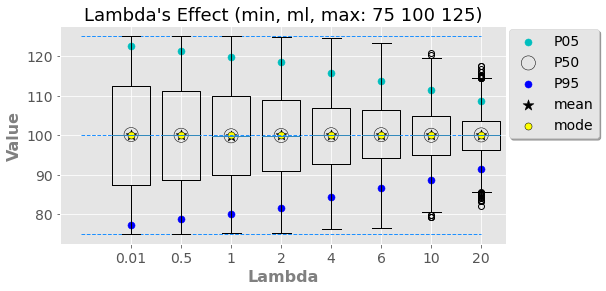

In [7]:
list=[1,2,3,4,5,6,7,8]
mode=[bml2, bml2,bml2,bml2,bml2,bml2,bml2,bml2]

figdata=[fbvals_1, fbvals_50, fbvals_100, fbvals_200, fbvals_400, fbvals_600, fbvals_1000, fbvals_2000]
fig = plt.figure(figsize=(8,4))
plt.boxplot(figdata, widths=.75) # patch_artist=True


plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['0.01','0.5','1','2','4', '6', '10', '20'])
plt.scatter(list, df_stats_beta['P05'],  s= 50, c='c',label='P05')
plt.scatter(list, df_stats_beta['P50'], s= 200, facecolor='none', edgecolor='k', label='P50')
plt.scatter(list, df_stats_beta['P95'],  s= 50, c='b', facecolor='none', edgecolor='b', label='P95')
plt.scatter(list, df_stats_beta['mean'], marker ='*', s= 130, c='k', label='mean')
plt.scatter(list, mode,  s= 50, facecolor='yellow', edgecolor='k', label='mode')
# plt.scatter(list, df_mode['x'],  s= 50, facecolor='yellow', edgecolor='k', label='mode')
plt.legend(shadow=True, fontsize=14, bbox_to_anchor=(.99, 1.02))

plt.title("Lambda's Effect (min, ml, max: "+ str(amin)+' '+str(bml)+' ' + str(cmax)+')', fontsize=18)
plt.xlabel('Lambda', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Value', fontsize =16, fontweight='bold', color='gray')

plt.hlines(amin, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(bml, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(cmax, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.show()

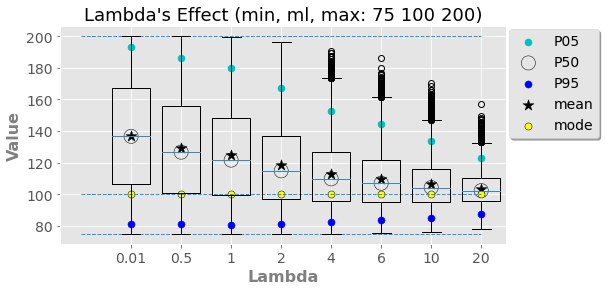

In [8]:
list=[1,2,3,4,5,6,7,8]
mode=[bml2, bml2,bml2,bml2,bml2,bml2,bml2,bml2]

figdata=[fbvals2_1, fbvals2_50, fbvals2_100, fbvals2_200, fbvals2_400, fbvals2_600, fbvals2_1000, fbvals2_2000]
fig = plt.figure(figsize=(8,4))
plt.boxplot(figdata, widths=.75) # patch_artist=True


plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['0.01','0.5','1','2','4', '6', '10', '20'])
plt.scatter(list, df_stats_beta2['P05'],  s= 50, c='c',label='P05')
plt.scatter(list, df_stats_beta2['P50'], s= 200, facecolor='none', edgecolor='k', label='P50')
plt.scatter(list, df_stats_beta2['P95'],  s= 50, c='b', facecolor='none', edgecolor='b', label='P95')
plt.scatter(list, df_stats_beta2['mean'], marker ='*', s= 130, c='k', label='mean')
plt.scatter(list, mode,  s= 50, facecolor='yellow', edgecolor='k', label='mode')
# plt.scatter(list, df_mode['x'],  s= 50, facecolor='yellow', edgecolor='k', label='mode')
plt.legend(shadow=True, fontsize=14, bbox_to_anchor=(.99, 1.02))

plt.title("Lambda's Effect (min, ml, max: "+ str(amin2)+' '+str(bml2)+' ' + str(cmax2)+')', fontsize=18)
plt.xlabel('Lambda', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Value', fontsize =16, fontweight='bold', color='gray')

plt.hlines(amin2, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(bml2, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(cmax2, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.show()